## 복습
- 상수;Constant : => 모수 => 확실한 결론
- 변수;Variable : => 추론통계 => 변동 => Cov (공분산)

- 기본 : 숫자, 문자열
- 복합 : List,Tuple, Dictionary, set => 중복(x) =>차집합

In [2]:
import pandas as pd
left = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                   'key2':['K0','K1','K0','K1'],
                    'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   })

right = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                   'key2':['K0','K0','K0','K0'],
                    'C':['C0','C1','C2','C3'],
                   'D':['D0','D1','D2','D3'],
                   })

In [3]:
result = pd.merge(left,right, on=['key1','key2'])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K2,K0,A2,B2,C2,D2


In [4]:
result = pd.merge(left,right, on=['key1','key2'] ,how='left')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,NaN,NaN
2,K2,K0,A2,B2,C2,D2
3,K3,K1,A3,B3,NaN,NaN


In [5]:
result = pd.merge(left,right, on=['key1','key2'] ,how='right')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,NaN,NaN,C1,D1
2,K2,K0,A2,B2,C2,D2
3,K3,K0,NaN,NaN,C3,D3


In [6]:
result = pd.merge(left,right, on=['key1','key2'] ,how='outer')
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,NaN,NaN
2,K2,K0,A2,B2,C2,D2
3,K3,K1,A3,B3,NaN,NaN
4,K1,K0,NaN,NaN,C1,D1
5,K3,K0,NaN,NaN,C3,D3


In [7]:
result = pd.merge(left,right, on=['key1','key2'] ,how='left', indicator=True)
result

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K1,K1,A1,B1,NaN,NaN,left_only
2,K2,K0,A2,B2,C2,D2,both
3,K3,K1,A3,B3,NaN,NaN,left_only


In [8]:
import pandas as pd
left = pd.DataFrame({'key1':['1','2','3','4'],
                 
                    'A':['A0','A1','A2','A3'],
                   'B':['B0','B1','B2','B3'],
                   })

right = pd.DataFrame({
                    'C':['C1','C2','C5'],
                   'D':['D1','D2','D5'],
                   }, index=[1,2,5])

In [9]:
result = left.join(right)
result

,key1,A,B,C,D
0,1,A0,B0,NaN,NaN
1,2,A1,B1,C1,D1
2,3,A2,B2,C2,D2
3,4,A3,B3,NaN,NaN


In [10]:
result=left.join(right,how='right')
result

,key1,A,B,C,D
1,2,A1,B1,C1,D1
2,3,A2,B2,C2,D2
5,NaN,NaN,NaN,C5,D5


In [11]:
result=left.join(right,how='inner')
result

,key1,A,B,C,D
1,2,A1,B1,C1,D1
2,3,A2,B2,C2,D2


In [12]:
df = pd.DataFrame({'factor1':['A','A','A','A','A','B','B','B','B',],
                  'factor2':['a','b','c','a','b','a','b','c','c',],
                  'value':[11,13,12,12,14,12,13,11,12]})
df

,factor1,factor2,value
0,A,a,11
1,A,b,13
2,A,c,12
3,A,a,12
4,A,b,14
5,B,a,12
6,B,b,13
7,B,c,11
8,B,c,12


In [13]:
# index,columns 지정
pd.crosstab(df.factor1,df.factor2)

factor2,a,b,c
factor1,,,
A,2,2,1
B,1,1,2


In [14]:
pd.crosstab(df.factor1,df.factor2,
           rownames=['Fact1'],colnames=['Fact2'],
           margins=True) # margins은 All은 나타내줌

Fact2,a,b,c,All
Fact1,,,,
A,2,2,1,5
B,1,1,2,4
All,3,3,3,9


In [15]:
pd.crosstab(df.factor1,[df.factor2,df.value])

factor2  a     b     c   
value   11 12 13 14 11 12
factor1                  
A        1  1  1  1  0  1
B        0  1  1  0  1  1

In [16]:
pd.crosstab(df.factor1,df.factor2, margins=True,normalize=True)
# normalize는 정규화 수치를 나타내줌

factor2,a,b,c,All
factor1,,,,
A,0.222222,0.222222,0.111111,0.555556
B,0.111111,0.111111,0.222222,0.444444
All,0.333333,0.333333,0.333333,1.000000


In [17]:
df = pd.read_excel('data/판매실적_이해.xlsx',sheet_name = 'Sheet1')
df = df.dropna()
df.head()

,지역,제품,판매수,판매액
0,동부,TV,1,1000
1,남부,TV,1,1000
2,서부,냉장고,1,2000
3,동부,세탁기,1,1000
4,북부,세탁기,1,1000


In [18]:
# 중복 데이터 조회(Boolean)
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9      True
10    False
11    False
dtype: bool

In [19]:
# 중복 데이터 조회
df[df.duplicated()]

,지역,제품,판매수,판매액
8,동부,TV,1,1000
9,남부,냉장고,1,2000


In [20]:
# 중복 데이터 제거
df.drop_duplicates().reset_index()

,index,지역,제품,판매수,판매액
0,0,동부,TV,1,1000
1,1,남부,TV,1,1000
2,2,서부,냉장고,1,2000
3,3,동부,세탁기,1,1000
4,4,북부,세탁기,1,1000
5,5,동부,냉장고,2,4000
6,6,남부,냉장고,1,2000
7,7,서부,세탁기,1,1000
8,10,서부,TV,1,1000
9,11,남부,세탁기,1,1000


In [21]:
import numpy as np
# 탭으로 분리된 (tsv) .txt 텍스트 파일 불러오기

pop_seoul = pd.read_csv('data/서울인구통계.txt',sep='\t',thousands=',',
                       skiprows=2,encoding='utf-8')
# thousands=',' : , 없애줌 ,없애줘야 정상적으로 수치형 데이터가 들어온다.
# skiprows=2 : 필요 없는 2행 없애줌
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.3/4,합계,4421143,9765869,4739972,5025897,9542256,4636069,4906187,223613,103903,119710,2.16,1592339
1,2021.3/4,종로구,73652,154318,74561,79757,145512,70666,74846,8806,3895,4911,1.98,27776
2,2021.3/4,중구,63267,131943,64274,67669,122858,59853,63005,9085,4421,4664,1.94,24225
3,2021.3/4,용산구,111177,238300,115655,122645,224145,107801,116344,14155,7854,6301,2.02,38906
4,2021.3/4,성동구,134620,294140,143055,151085,287820,140290,147530,6320,2765,3555,2.14,46053


In [22]:
# 자치구별 인구합계, 한국인 합계, 외국인 합계, 고령자 데이터만을 추출
# index 0 행 (합계)은 중복으로 필요 없는 행으로 삭제
pop1 = pop_seoul[['자치구','계','계.1','계.2','65세이상고령자']]
pop_seoul=pop1.drop([0])
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053
5,광진구,353380,341112,12268,51278


In [23]:
# 컬럼명을 구분할 수 있도록 리네임
pop_seoul.rename( columns= { pop_seoul.columns[0]:'구별',
                           pop_seoul.columns[1]:'인구수',
                           pop_seoul.columns[2]:'한국인',
                            pop_seoul.columns[3]:'외국인',
                           pop_seoul.columns[4]:'고령자',},
                inplace=True,)

pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,154318,145512,8806,27776
2,중구,131943,122858,9085,24225
3,용산구,238300,224145,14155,38906
4,성동구,294140,287820,6320,46053
5,광진구,353380,341112,12268,51278


In [24]:
# epdlxj qnffjdhrl
cctv_seoul = pd.read_excel('data/서울시CCTV.xlsx',skiprows=2,
                          names=['기관명','소계','2011년 이전','2012년',
                                '2013년','2014년',
                                '2015년','2016년','2017년','2018년','2019년','2020년','2021년',])
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [25]:
# 컬럼의 데이터를 확인
cctv_seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년'],
      dtype='object')

In [26]:
# 인구통계 자료와 통일하기 위해 기관명을 구별로 인덱스 이름 변경
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'},inplace=True)

In [27]:
# inplace = True로 해야 값까지 다포함해서 가져감
cctv_seoul.rename(columns={cctv_seoul.columns[1]:'cctv수'},inplace=True)

In [28]:
# 소계를 cctv수로 이름 변경
cctv_seoul.head()

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32


In [29]:
# sort_values : 값을 기준으로 정렬, by = 기준열
cctv_seoul.sort_values(by='cctv수',ascending=True).head(10)

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43
19,동작구,2297,41,24,25,503,128,253,271,300,322,419,11
1,중 구,2333,16,114,87,77,236,240,372,386,155,361,289
17,금천구,2374,0,0,178,80,361,133,196,540,369,508,9
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0
10,노원구,2415,0,97,193,77,516,331,175,216,320,386,104
13,마포구,2421,58,93,77,61,162,454,359,343,494,300,20
8,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39
5,동대문구,2497,1090,146,60,29,111,233,136,197,209,223,63


In [30]:
cctv_seoul.sort_values(by='cctv수',ascending=False).head(10)

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
22,강남구,6502,124,77,75,597,840,1310,999,748,789,942,1
20,관악구,4942,428,205,291,513,529,621,687,663,640,331,34
16,구로구,4075,852,216,349,187,268,326,540,488,434,415,0
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131
18,영등포구,3778,572,136,238,123,209,248,311,658,65,1213,5
21,서초구,3704,116,75,94,71,563,516,1060,428,358,420,3
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76
14,양천구,3312,1413,167,181,143,180,350,139,140,274,325,0
6,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4


In [31]:
cctv_seoul.isnull().sum()

구별          0
cctv수       0
2011년 이전    0
2012년       0
2013년       0
2014년       0
2015년       0
2016년       0
2017년       0
2018년       0
2019년       0
2020년       0
2021년       0
dtype: int64

In [32]:
# 최근 3년간 cctv 증가율 비교
# 증가율 = 2019~ 2021 cctv 수 / 2019 이전 이전 cctv 수
cctv_seoul['최근증가율'] =(cctv_seoul['2021년']+cctv_seoul['2020년']+cctv_seoul['2019년'])\
                     /(cctv_seoul['cctv수']-(cctv_seoul['2021년']+cctv_seoul['2020년']+cctv_seoul['2019년'])*100)

cctv_seoul.sort_values(by='최근증가율',ascending=False).head(5)

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
8,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39,-0.010154
6,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4,-0.010168
23,송파구,2854,72,61,86,85,215,148,241,542,1068,235,101,-0.010207
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331,-0.010239
11,은평구,3791,14,3,44,332,329,555,403,635,1057,288,131,-0.010264


In [33]:
# 구별'외국인 비율' 과 '고렬자비율'을 계산
pop_seoul['외국인 비율'] = pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul['고령자 비율'] = pop_seoul['고령자']/pop_seoul['인구수']*100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
1,종로구,154318,145512,8806,27776,5.706398,17.999196
2,중구,131943,122858,9085,24225,6.885549,18.360201
3,용산구,238300,224145,14155,38906,5.939992,16.326479
4,성동구,294140,287820,6320,46053,2.148637,15.656830
5,광진구,353380,341112,12268,51278,3.471617,14.510725


In [34]:
# 전체'외국인비율','외국인' 로 정렬
pop_seoul.sort_values( by='외국인 비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
2,중구,131943,122858,9085,24225,6.885549,18.360201
19,영등포구,401814,377536,24278,62108,6.042099,15.456903
3,용산구,238300,224145,14155,38906,5.939992,16.326479
17,구로구,422361,397506,24855,71930,5.884776,17.030455
18,금천구,244887,230644,14243,40691,5.816152,16.616235


In [35]:
pop_seoul.sort_values( by='고령자 비율',ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
9,강북구,304257,300887,3370,63914,1.107616,21.006583
10,도봉구,320711,318718,1993,63448,0.621432,19.783543
2,중구,131943,122858,9085,24225,6.885549,18.360201
12,은평구,477961,474062,3899,86724,0.815757,18.144577
7,중랑구,393149,388554,4595,70908,1.168768,18.035910


In [95]:
cctv_seoul.head()
# cctv_seoul의 "구별"열의 내용이 글자사이 공백으로 인해 병합이 되지 않기 때문에 rename 실시
cctv_seoul['구별']=cctv_seoul['구별'].str.replace(',','')
cctv_seoul

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,-0.010756
1,중구,2333,16,114,87,77,236,240,372,386,155,361,289,-0.010298
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,-0.010265
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,-0.010472
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,-0.010290
5,동대문구,2497,1090,146,60,29,111,233,136,197,209,223,63,-0.010531
6,중랑구,3296,302,24,253,88,141,161,162,173,1049,939,4,-0.010168
7,성북구,3958,83,78,170,230,323,594,460,867,714,251,188,-0.010355
8,강북구,2462,0,0,24,65,105,243,6,392,1000,588,39,-0.010154
9,도봉구,1629,39,22,96,181,79,159,134,222,198,168,331,-0.010239


In [97]:


#merge를 사용하여 병합
result = pd.merge(cctv_seoul,pop_seoul,on='구별')
result.head()

,구별,cctv수,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,1772,813,0,0,210,150,1,261,85,9,200,43,-0.010756,154318,145512,8806,27776,5.706398,17.999196
1,중구,2333,16,114,87,77,236,240,372,386,155,361,289,-0.010298,131943,122858,9085,24225,6.885549,18.360201
2,용산구,2383,34,71,234,125,221,298,351,125,307,617,0,-0.010265,238300,224145,14155,38906,5.939992,16.326479
3,성동구,3602,448,125,212,105,339,310,874,390,262,461,76,-0.010472,294140,287820,6320,46053,2.148637,15.656830
4,광진구,2588,35,57,100,187,98,52,675,465,712,175,32,-0.010290,353380,341112,12268,51278,3.471617,14.510725


In [99]:
# 의미없는 컬럼을 del 명령어로 제거
# 일반적으로 행을 삭제할 때는 drop, 열을 삭제할때는 del을 사용
# 2011~21년까지의 cctv수는 의미가 없으므로 삭제
del result['2011년 이전']
del result['2012년']
del result['2013년']
del result['2014년']
del result['2015년']
del result['2016년']
del result['2017년']
del result['2018년']
del result['2019년']
del result['2020년']
del result['2021년']

result.head()

,구별,cctv수,최근증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
0,종로구,1772,-0.010756,154318,145512,8806,27776,5.706398,17.999196
1,중구,2333,-0.010298,131943,122858,9085,24225,6.885549,18.360201
2,용산구,2383,-0.010265,238300,224145,14155,38906,5.939992,16.326479
3,성동구,3602,-0.010472,294140,287820,6320,46053,2.148637,15.656830
4,광진구,2588,-0.010290,353380,341112,12268,51278,3.471617,14.510725


## 데이터 정제_연습

In [102]:
# 데이터 구성 패키지 : Series,DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 함수
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [106]:
import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

In [110]:
# 데이터에 한글 포함 -> encoding = 'euc-kr'
df_raw = pd.read_csv('data/FITNESS_정제.csv',encoding='euc-kr')

df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,NaN,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [112]:
# rufcmrcl(True) 현황 요약
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
BIRTH       0
dtype: int64

In [114]:
# 결측치 확인'
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [116]:
# 문자형 결측치 처리:pandas.DataFrame.fillna(값, inplace: 결츠칙 입력 후 저장 여부)
df_raw['GENDER'].fillna('여성',inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.15,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.87,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.84,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.87,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,NaN,49.156,8.95 SEC,180,44,185,1977-02-09


In [118]:
# 숫자형 결측치 처리 : groupby(범주형 변수),agg('집계함수')
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.426923
여성    72.908750
Name: WEIGHT, dtype: float64

In [122]:
# WEIGHT 변수의 결측치를 GENDER='남성'의 WEIGHT 평균으로 대체
df_raw["WEIGHT"]=df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform('mean')).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH
0,Donna,여성,42,40대,68.150,59.571,8.17 SEC,166,40,172,1976-04-05
1,Gracie,여성,38,30대,81.870,60.055,8.63 SEC,170,48,186,1986-09-06
2,Luanne,여성,43,40대,85.840,54.297,8.65 SEC,156,45,168,1978-04-07
3,Mimi,여성,50,50대,70.870,54.625,8.92 SEC,146,48,155,1966-08-08
4,Chris,남성,49,40대,82.427,49.156,8.95 SEC,180,44,185,1977-02-09


In [126]:
# 단위와 같이 표현되어 있는 수치형 변수 처리
df_raw[['RUNTIME','RUNTIME_UNIT']]=df_raw['RUNTIME'].str.split(' ',expand=True)
df_raw['RUNTIME'] = df_raw['RUNTIME'].astype('float64') #변수 속성 변경

In [128]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC


<Axes: >

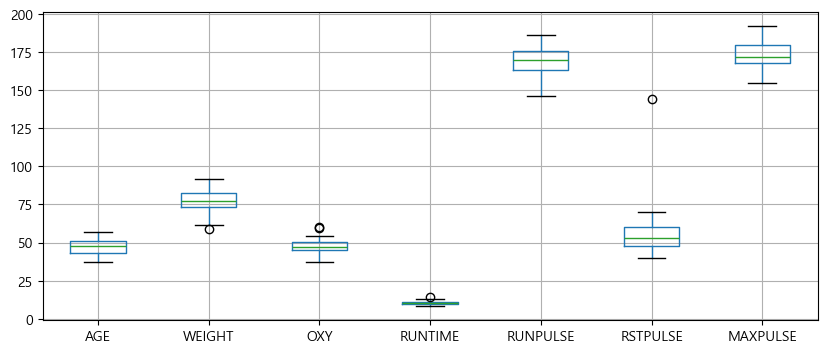

In [130]:
df_raw.boxplot(figsize = (10,4))

In [132]:
# RSTPULSE 변수에서 이상치(100보다 큰 값) 확인 : True/False 표시
df_raw['RSTPULSE']>=100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176,1968-05-02,SEC
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176,1976-12-04,SEC


In [134]:
# 조건 해당 자료 직접 확인
df_raw[(df_raw['RSTPULSE']>=100)]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172,1969-11-03,SEC


In [210]:
# 이상치 확인 및 처리 : 이상치 제거
# RSTPULSE 변수에서 이상치 제외 (100이하)

df_fintness=df_raw[df_fintness['RSTPULSE']<100]
df_fintness #자료수가 줄어듬

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [212]:
# 자료 index reset: DataFrame.reset_index
df_fintness.reset_index(drop = True,inplace=True)
df_fintness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180,1988-12-10,SEC
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188,1977-06-11,SEC
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166,1969-05-12,SEC
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155,1964-11-13,SEC
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168,1966-04-14,SEC


In [236]:
# 변수 생성 및 표준화 : 파생 변수 생성

# 일자 속성 변환 및 파생 변수 생성
df_fintness['BIRTH'] = pd.to_datetime(df_fintness['BIRTH'], format='%Y-%m-%d')
df_fintness.loc[:, 'Year'] = df_fintness['BIRTH'].dt.year
df_fintness.loc[:, 'month'] = df_fintness['BIRTH'].dt.month
df_fintness.loc[:, 'day'] = df_fintness['BIRTH'].dt.day
df_fintness.loc[:, 'weekday'] = df_fintness['BIRTH'].dt.weekday

df_fintness.head()

C:\Users\campus4D046\AppData\Local\Temp\ipykernel_1236\2522980828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fintness['BIRTH'] = pd.to_datetime(df_fintness['BIRTH'], format='%Y-%m-%d')


,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,RUNTIME_UNIT,Year,month,day,weekday
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172,1976-04-05,SEC,1976,4,5,0
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186,1986-09-06,SEC,1986,9,6,5
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168,1978-04-07,SEC,1978,4,7,4
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155,1966-08-08,SEC,1966,8,8,0
4,Chris,남성,49,40대,82.427,49.156,8.95,180,44,185,1977-02-09,SEC,1977,2,9,2


In [238]:
# 분석에 필요하지 않은 변수 제외
df_fintness_dummy = df_fintness.drop(['NAME','BIRTH','RUNTIME_UNIT'],axis=1)
df_fintness_dummy.head()

,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,Year,month,day,weekday
0,여성,42,40대,68.150,59.571,8.17,166,40,172,1976,4,5,0
1,여성,38,30대,81.870,60.055,8.63,170,48,186,1986,9,6,5
2,여성,43,40대,85.840,54.297,8.65,156,45,168,1978,4,7,4
3,여성,50,50대,70.870,54.625,8.92,146,48,155,1966,8,8,0
4,남성,49,40대,82.427,49.156,8.95,180,44,185,1977,2,9,2


In [240]:
# 범주형 변수의 Dummy 변수화
df_fintness_dummy = pd.get_dummies(df_fintness,drop_first=True)
df_fintness_dummy.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,Year,month,...,NAME_Ralph,NAME_Sammy,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,42,68.150,59.571,8.17,166,40,172,1976-04-05,1976,4,...,False,False,False,False,False,False,False,True,True,False
1,38,81.870,60.055,8.63,170,48,186,1986-09-06,1986,9,...,False,False,False,False,False,False,False,True,False,False
2,43,85.840,54.297,8.65,156,45,168,1978-04-07,1978,4,...,False,False,False,False,False,False,False,True,True,False
3,50,70.870,54.625,8.92,146,48,155,1966-08-08,1966,8,...,False,False,False,False,False,False,False,True,False,True
4,49,82.427,49.156,8.95,180,44,185,1977-02-09,1977,2,...,False,False,False,False,False,False,False,False,True,False


In [242]:
# scale 변환 : 평균-표준편차 척도 기준
df_scale_std = StandardScaler()

In [234]:

# StandardScaler 적용

df_scale_std = scaler.fit_transform(df_fintness_dummy) 

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.Int32DType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>, <class 'numpy.dtypes.BoolDType'>)

In [244]:

# datetime64 타입의 열과 수치형 데이터를 분리
df_datetime = df_fintness_dummy.select_dtypes(include=['datetime64'])
df_numeric = df_fintness_dummy.select_dtypes(exclude=['datetime64'])

# StandardScaler 적용
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df_numeric)

# 변환된 결과를 DataFrame으로 변환하고 원래의 열 이름 사용
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=df_numeric.columns)

# 스케일링된 데이터프레임과 datetime 열 병합
df_scale_std = pd.concat([df_scaled_numeric, df_datetime], axis=1)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,Year,month,day,...,NAME_Sammy,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대,BIRTH
0,-0.805985,-1.119366,2.334717,-1.771826,-0.361066,-1.856653,-0.200185,-0.008206,-0.814663,-1.233538,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,0.935414,1.069045,-0.707107,1976-04-05
1,-1.506841,0.607422,2.429494,-1.423469,0.029276,-0.777726,1.328503,1.222750,0.606261,-1.116799,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,0.935414,-0.935414,-0.707107,1986-09-06
2,-0.630771,1.107082,1.301962,-1.408323,-1.336919,-1.182324,-0.636953,0.237985,-0.814663,-1.000061,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,0.935414,1.069045,-0.707107,1978-04-07
3,0.595728,-0.777029,1.366191,-1.203852,-2.312773,-0.777726,-2.056450,-1.239163,0.322076,-0.883322,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,0.935414,-0.935414,1.414214,1966-08-08
4,0.420514,0.677525,0.295251,-1.181133,1.005129,-1.317190,1.219311,0.114889,-1.383032,-0.766583,...,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-0.185695,-1.069045,1.069045,-0.707107,1977-02-09


In [246]:
# scale 변환 결과 확인 : 요약 통계량 : pandas.DateFrame.describe()
df_scale_desc=df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,Year,month,day,...,NAME_Sammy,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대,BIRTH
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,...,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30.000,30
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,1976-08-05 01:36:00
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056,-1.608,-1.667,-1.700,...,-0.186,-0.186,-0.186,-0.186,-0.186,-0.186,-1.069,-0.935,-0.707,1963-11-19 00:00:00
25%,-0.631,-0.494,-0.486,-0.609,-0.703,-0.778,-0.637,-0.808,-0.815,-0.854,...,-0.186,-0.186,-0.186,-0.186,-0.186,-0.186,-1.069,-0.935,-0.707,1969-11-05 00:00:00
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200,-0.008,-0.388,-0.008,...,-0.186,-0.186,-0.186,-0.186,-0.186,-0.186,0.935,-0.935,-0.707,1976-12-13 00:00:00
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673,0.361,1.033,0.839,...,-0.186,-0.186,-0.186,-0.186,-0.186,-0.186,0.935,1.069,1.414,1979-09-10 18:00:00
max,1.822,1.836,2.429,2.666,1.591,2.189,1.984,1.838,1.459,1.685,...,5.385,5.385,5.385,5.385,5.385,5.385,0.935,1.069,1.414,1991-04-21 00:00:00
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,...,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,1.017,NaN


In [188]:
# scale 변환 : 최소 - 최대값  척도 기준
# datetime64 타입의 열과 수치형 데이터를 분리
df_datetime = df_fintness_dummy.select_dtypes(include=['datetime64'])
df_numeric = df_fintness_dummy.select_dtypes(exclude=['datetime64'])

# MinMaxScaler 적용
scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(df_numeric)

# 변환된 결과를 DataFrame으로 변환하고 원래의 열 이름 사용
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=df_numeric.columns)

# 스케일링된 데이터프레임과 datetime 열 병합
df_scale_minmax = pd.concat([df_scaled_numeric, df_datetime], axis=1)

df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,Year,month,day,...,NAME_Steve,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대,BIRTH
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459,0.464286,0.272727,0.137931,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1976-04-05
1,0.05,0.700154,1.000000,0.078498,0.60,0.076923,0.837838,0.821429,0.727273,0.172414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1986-09-06
2,0.30,0.822120,0.745974,0.081911,0.25,0.048077,0.351351,0.535714,0.272727,0.206897,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1978-04-07
3,0.65,0.362212,0.760445,0.127986,0.00,0.076923,0.000000,0.107143,0.636364,0.241379,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1966-08-08
4,0.60,NaN,0.519169,0.133106,0.85,0.038462,0.810811,0.500000,0.090909,0.275862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1977-02-09


In [190]:
# scale 변환 결과 : 요약 통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,Year,month,day,...,NAME_Steve,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대,BIRTH
count,31.000,29.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,...,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31
mean,0.492,0.556,0.441,0.412,0.591,0.160,0.507,0.459,0.545,0.488,...,0.032,0.032,0.032,0.032,0.032,0.032,0.484,0.452,0.355,1976-05-17 11:36:46.451612896
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1963-11-19 00:00:00
25%,0.300,0.429,0.334,0.275,0.425,0.077,0.351,0.214,0.273,0.224,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1969-08-07 12:00:00
50%,0.550,0.530,0.414,0.392,0.600,0.125,0.459,0.464,0.455,0.483,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1976-12-04 00:00:00
75%,0.700,0.726,0.562,0.529,0.750,0.197,0.676,0.571,0.909,0.741,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1979-08-29 12:00:00
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1991-04-21 00:00:00
std,0.293,0.263,0.235,0.237,0.256,0.171,0.248,0.294,0.327,0.305,...,0.180,0.180,0.180,0.180,0.180,0.180,0.508,0.506,0.486,NaN


In [196]:
# scale 변환 : 로버스트 척도 기준
# datetime64 타입의 열과 수치형 데이터를 분리
df_datetime = df_fintness_dummy.select_dtypes(include=['datetime64'])
df_numeric = df_fintness_dummy.select_dtypes(exclude=['datetime64'])

# RobustScaler 적용
scaler = RobustScaler()
scaled_numeric = scaler.fit_transform(df_numeric)

# 변환된 결과를 DataFrame으로 변환하고 원래의 열 이름 사용
df_scaled_numeric = pd.DataFrame(scaled_numeric, columns=df_numeric.columns)

# 스케일링된 데이터프레임과 datetime 열 병합
df_scale_robust = pd.concat([df_scaled_numeric, df_datetime], axis=1)

In [248]:
# scale 적용/변환하면 numpy 의 ndarray 형태로 저장 -> DataFrame 으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust,columns=df_fintness_dummy.columns)
df_scale_robust.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,Year,month,...,NAME_Ralph,NAME_Sammy,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
0,-0.750,-0.845,2.477,-1.544,-0.308,-1.04,0.000,1976-04-05,0.0,-0.286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-1.250,0.574,2.571,-1.235,0.000,-0.40,1.167,1986-09-06,1.0,0.429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.625,0.984,1.456,-1.221,-1.077,-0.64,-0.333,1978-04-07,0.2,-0.286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.250,-0.564,1.520,-1.040,-1.846,-0.40,-1.417,1966-08-08,-1.0,0.286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.125,NaN,0.461,-1.020,0.769,-0.72,1.083,1977-02-09,0.1,-0.571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-1.250,1.313,0.600,-0.839,0.615,0.16,0.667,1988-12-10,1.2,0.857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.125,0.000,0.368,-0.718,1.231,0.24,1.333,1977-06-11,0.1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.500,0.000,-0.258,-0.564,-0.462,-0.40,-0.500,1969-05-12,-0.7,-0.143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,1.125,-1.783,0.730,-0.362,-1.692,-0.32,-1.417,1964-11-13,-1.2,0.714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9,0.375,0.164,-0.020,-0.315,-0.615,-0.40,-0.333,1966-04-14,-1.0,-0.286,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [200]:
# scale 변환 결과 : 요약 통계량 : pandas.DataFrame.describe()
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,BIRTH,Year,month,...,NAME_Sammy,NAME_Steve,NAME_Suzanne,NAME_Teresa,NAME_Trent,NAME_Vaughn,NAME_William,GENDER_여성,AGEGROUP_40대,AGEGROUP_50대
count,31.000,29.000,31.000,31.000,31.000,31.000,31.000,31,31.000,31.000,...,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,-0.145,0.088,0.116,0.078,-0.027,0.294,0.148,1976-05-17 11:36:46.451612896,-0.016,0.143,...,0.032,0.032,0.032,0.032,0.032,0.032,0.032,0.484,0.452,0.355
min,-1.375,-1.783,-1.817,-1.544,-1.846,-1.040,-1.417,1963-11-19 00:00:00,-1.300,-0.714,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.625,-0.340,-0.350,-0.463,-0.538,-0.400,-0.333,1969-08-07 12:00:00,-0.700,-0.286,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1976-12-04 00:00:00,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.375,0.660,0.650,0.537,0.462,0.600,0.667,1979-08-29 12:00:00,0.300,0.714,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
max,1.125,1.583,2.571,2.389,1.231,7.280,1.667,1991-04-21 00:00:00,1.500,0.857,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
std,0.733,0.884,1.031,0.931,0.789,1.426,0.764,NaN,0.822,0.514,...,0.180,0.180,0.180,0.180,0.180,0.180,0.180,0.508,0.506,0.486


In [202]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"]=df_fintness_dummy["RSTPULSE"]
df_rstpulse["Standard"]=df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"]=df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"]=df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-0.951,0.000,-1.04
1,48,-0.495,0.077,-0.40
2,45,-0.666,0.048,-0.64
3,48,-0.495,0.077,-0.40
4,44,-0.723,0.038,-0.72


In [204]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,31.000,31.000,31.000,31.000
mean,56.677,-0.000,0.160,0.294
std,17.822,1.017,0.171,1.426
min,40.000,-0.951,0.000,-1.040
25%,48.000,-0.495,0.077,-0.400
50%,53.000,-0.210,0.125,0.000
75%,60.500,0.218,0.197,0.600
max,144.000,4.981,1.000,7.280


array([[<Axes: title={'center': 'Raw'}>,
        <Axes: title={'center': 'Standard'}>],
       [<Axes: title={'center': 'MinMax'}>,
        <Axes: title={'center': 'Robust'}>]], dtype=object)

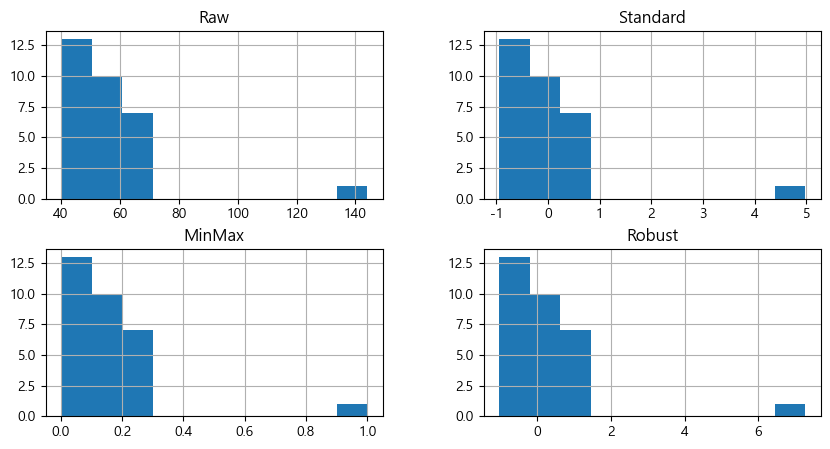

In [206]:
# pands의 DataFrame.hist 이용 (figsize=(x축 크기,y축 크기))
df_rstpulse[['Raw','Standard','MinMax','Robust']].hist(figsize=(10,5))

In [1]:
import pandas as pd
import numpy as np
import matplotlib # 데이터 시각화 패키지
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # 경고 메세지 처리

In [2]:
# 한글설치
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 실행결과 경고메시지 출력제외
warnings.filterwarnings('ignore')

In [3]:
# 데이터 불러오기 , 운동 데이터
df_fitness = pd.read_csv('data/health.csv',encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [7]:
# 환율 데이터
df_currency = pd.read_csv('data/exchange.csv',parse_dates=['APPL_DATE'])
# parse_dates : 날짜 변수 지정
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


<Axes: xlabel='GENDER'>

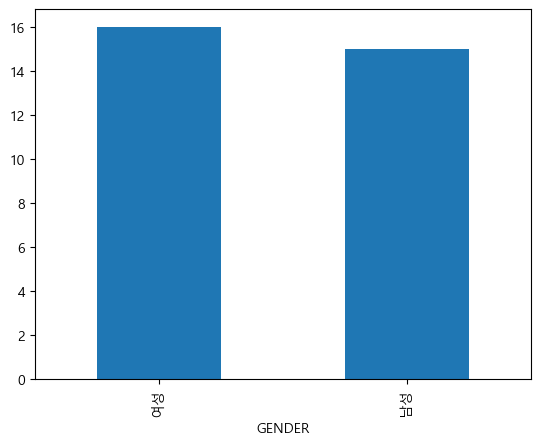

In [9]:
# 성별 Bar Chart 그리기
df_count = df_fitness['GENDER'].value_counts()
df_count.plot.bar()

<Axes: xlabel='AGEGROUP'>

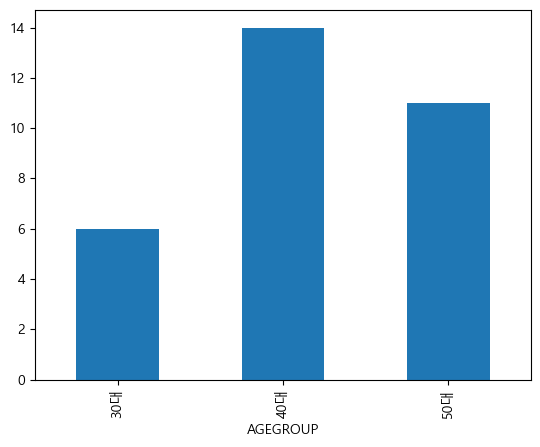

In [11]:
# 연령대별 Bar Chart 그리기
df_count = df_fitness['AGEGROUP'].value_counts()
#sort_index(inplace = True) : 정렬 결과를 저장
df_count.sort_index(inplace=True)
df_count.plot.bar()

<Axes: xlabel='GENDER,AGEGROUP'>

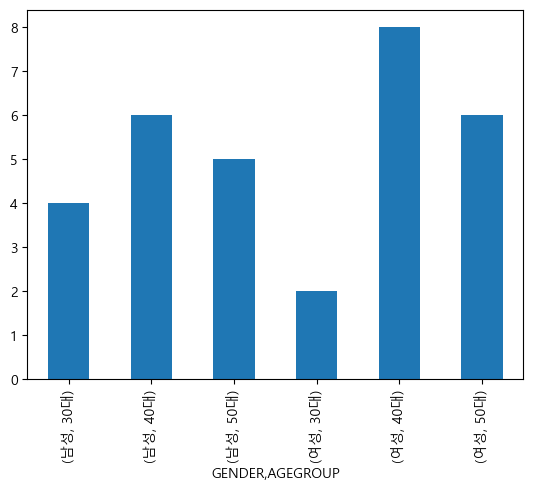

In [13]:
# 성 + 연령대별 Bar Chart 그리기
df_group_total = df_fitness.groupby(['GENDER','AGEGROUP']).size()
# size 가 빈도수
df_group_total.plot.bar()

<Axes: ylabel='AGEGROUP'>

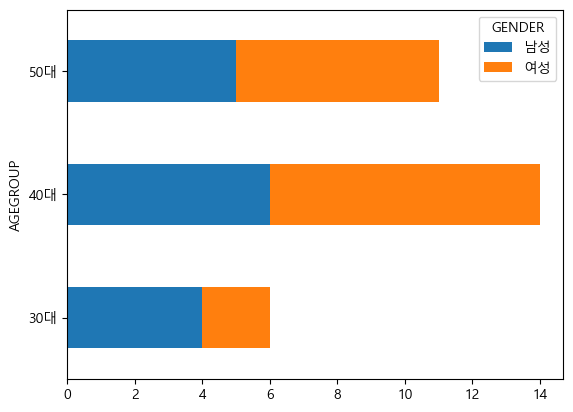

In [15]:
# 누적 막대 그래프
df_group_total = df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False)['WEIGHT'].agg('count')
df_pivot = df_group_total.pivot(index='AGEGROUP', columns='GENDER', values='WEIGHT')
#df_pivot = df_group_total.pivot('AGEGROUP','GENDER','WEIGHT')
df_pivot.plot(kind='barh',stacked = True)
# barh 옆으로 그리겠다 , stacke 쌓아서 옆으로 그리겠다.

<Axes: ylabel='AGEGROUP'>

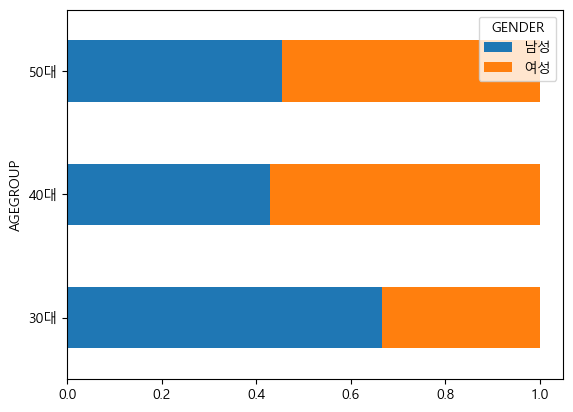

In [17]:
df_pivot_norm = df_pivot.div(df_pivot.sum(1),axis=0)
df_pivot_norm.plot(kind = 'barh',stacked=True)

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <BarContainer object of 10 artists>)

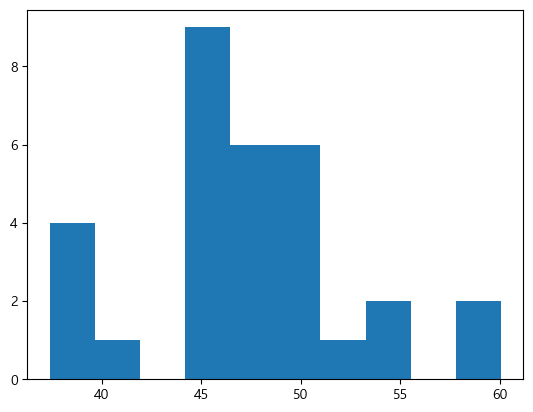

In [19]:
# 혈당산소 요구량(OXY)의 Histogram 그리기

# matplotlib 활용
plt.hist(df_fitness['OXY'])

#pandas 활용

<Axes: >

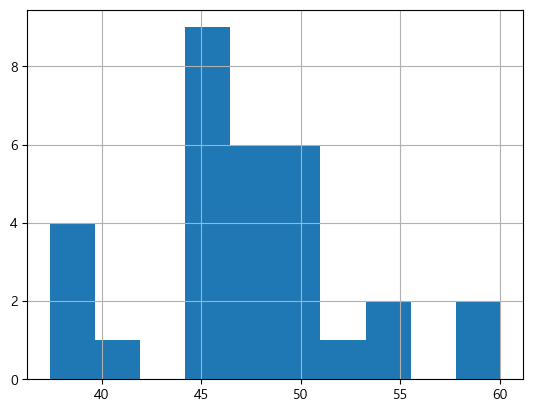

In [21]:
df_fitness['OXY'].hist()

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'WEIGHT'}>,
        <Axes: title={'center': 'OXY'}>],
       [<Axes: title={'center': 'RUNTIME'}>,
        <Axes: title={'center': 'RUNPULSE'}>,
        <Axes: title={'center': 'RSTPULSE'}>],
       [<Axes: title={'center': 'MAXPULSE'}>, <Axes: >, <Axes: >]],
      dtype=object)

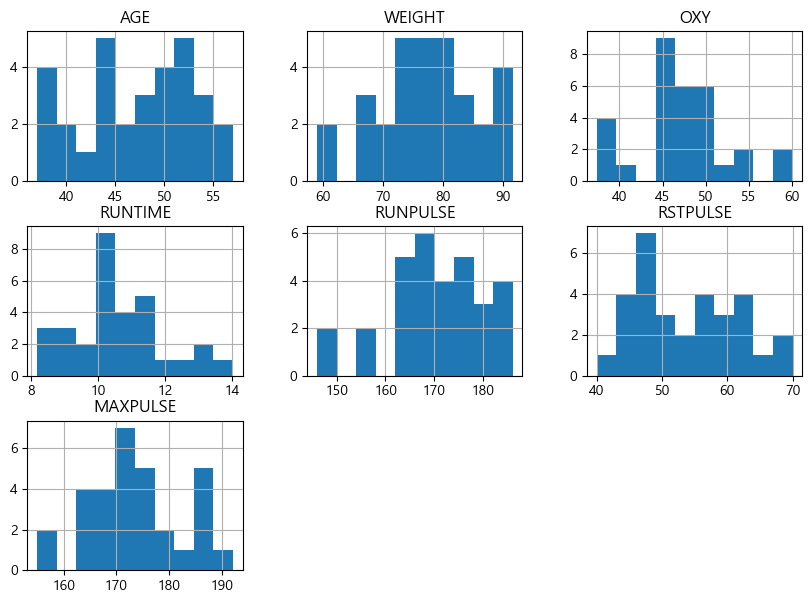

In [23]:
# 숫자형 변수에 대한 Histogram 그리기
df_fitness.hist(figsize=(10,7))

array([<Axes: title={'center': '남성'}>, <Axes: title={'center': '여성'}>],
      dtype=object)

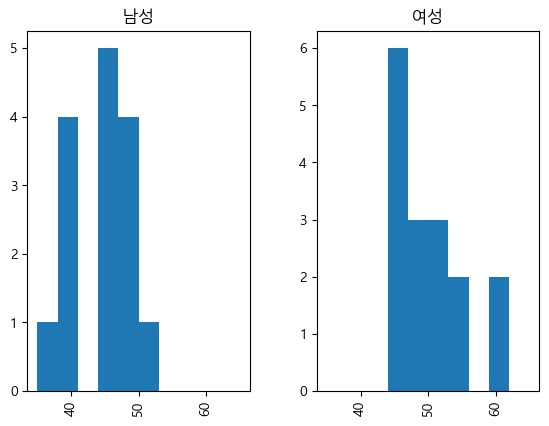

In [24]:
# 성별로 혈당산소 요구량(OXY)의 Histogram 그리기
# pandas 활용
# hist(column='변수' , by= 그룹변수,  range=(최소값,최대값)) -X축 범위 통일
df_fitness.hist(column='OXY',by='GENDER',range=(35,65))

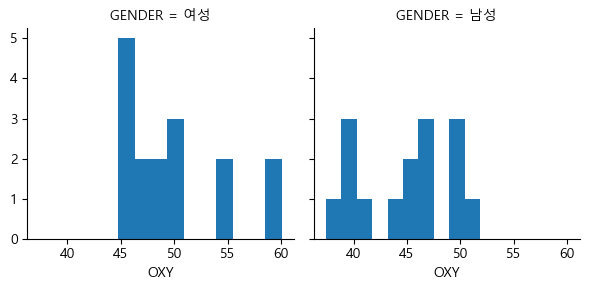

In [25]:
# seaborn 활용. FacetGrid(데이터 지정,col=컬럼 지정)
grid= sns.FacetGrid(df_fitness,col='GENDER')
# 함수로 matplotlib.pyplot 활용
grid.map(plt.hist,'OXY')

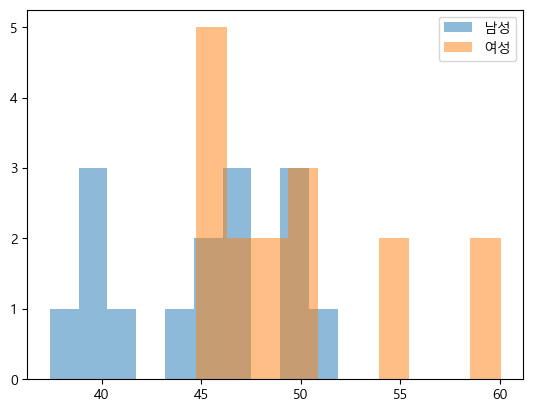

In [28]:
# 성별로 혈당 산소 요구량(OXY)을 중첩해서 Histogram 그리기

# matplotlib 활용 - hist(변수,label='표시 값',alpha=투명도(0~1지정))
plt.hist(df_fitness[df_fitness['GENDER']=='남성']['OXY'],label='남성',alpha=0.5)
plt.hist(df_fitness[df_fitness['GENDER']=='여성']['OXY'],label='여성',alpha=0.5)
plt.legend()

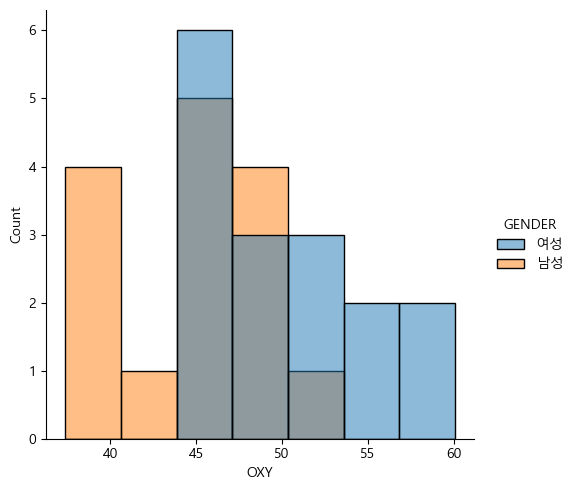

In [30]:
#seborn 활용
sns.displot(df_fitness, x='OXY',hue='GENDER')

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <BarContainer object of 20 artists>)

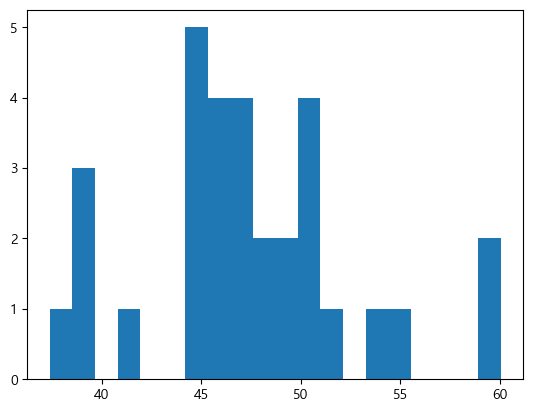

In [32]:
# 성별로 혈당 산소 요구량(OXY) : X 축의 구간수를 지정해서 Histogram 그리기

#matplotlib활용
# x축 구간(bin) 조정(상세 분포 확인)
plt.hist(data = df_fitness,x='OXY',  bins=20)

<Axes: title={'center': 'OXY'}, xlabel='[GENDER, AGEGROUP]'>

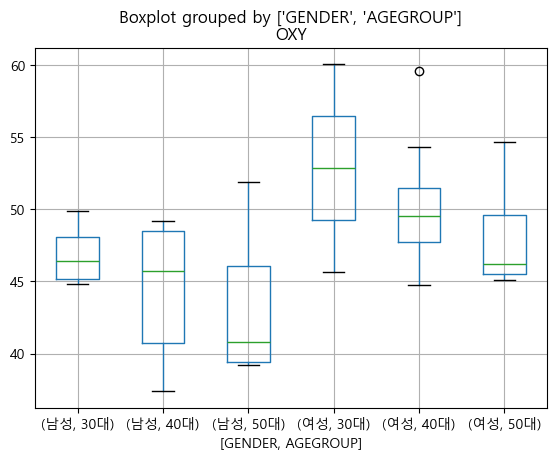

In [34]:
# 성 + 연령대별 혈당 산소 오구량 Box Plot 그리기
df_fitness.boxplot(column='OXY',by=['GENDER','AGEGROUP'])

([<matplotlib.patches.Wedge at 0x18f9cddb610>,
 [Text(0.055714135492219465, 1.0985881553641268, '남성'),
  Text(-0.055714238349465386, -1.098588150147788, '여성')],
 [Text(0.030389528450301524, 0.5992299029258873, '48.4%'),
  Text(-0.030389584554253845, -0.5992299000806116, '51.6%')])

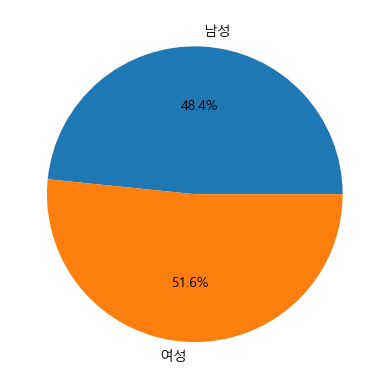

In [37]:
# 성별 Pie Chart 그리기
# 성별 그래프
df_count = df_fitness.groupby(['GENDER']).size()
plt.pie(df_count,labels = df_count.index,autopct="%.1f%%")



([<matplotlib.patches.Wedge at 0x18f9ce4b710>,
 [Text(1.0108535980228326, 0.4337914284126577, "('남성', '30대')"),
  Text(0.166570601230037, 1.0873151497178102, "('남성', '40대')"),
  Text(-0.9028397378807519, 0.6283951047735936, "('남성', '50대')"),
  Text(-1.0943562664864532, -0.11128504841995318, "('여성', '30대')"),
  Text(-0.48443369198771585, -0.9875849320778194, "('여성', '40대')"),
  Text(0.9028396790461523, -0.6283951893035473, "('여성', '50대')")],
 [Text(0.5513746898306359, 0.23661350640690418, '12.9%'),
  Text(0.09085669158002017, 0.5930809907551692, '19.4%'),
  Text(-0.4924580388440464, 0.3427609662401419, '16.1%'),
  Text(-0.5969215999017017, -0.06070093550179264, '6.5%'),
  Text(-0.2642365592660268, -0.5386826902242651, '25.8%'),
  Text(0.4924580067524466, -0.34276101234738937, '19.4%')])

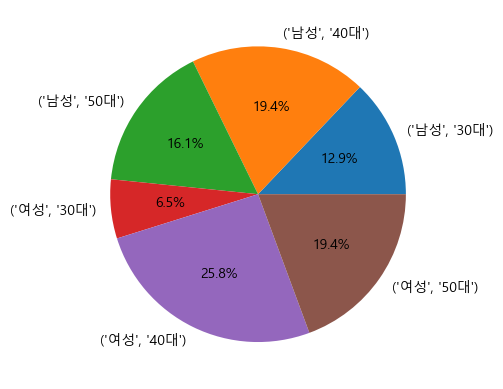

In [39]:
# 성+ 연령대별 그래프
df_count = df_fitness.groupby(['GENDER','AGEGROUP']).size()
plt.pie(df_count,labels=df_count.index,autopct='%.1f%%')

<Axes: xlabel='RUNTIME', ylabel='OXY'>

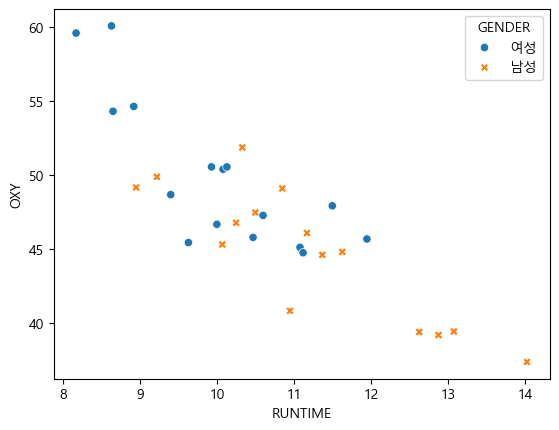

In [41]:
# 성별로 운동시간과 혈당 산소 요구량에 대한 Scatter Plot  그리기
# seaborn 활용
# scatterplot(x,y,hue: 그룹변수 , style:그룹별 marker 구분, data)
sns.scatterplot(x='RUNTIME',y='OXY',hue='GENDER',style='GENDER',data=df_fitness)

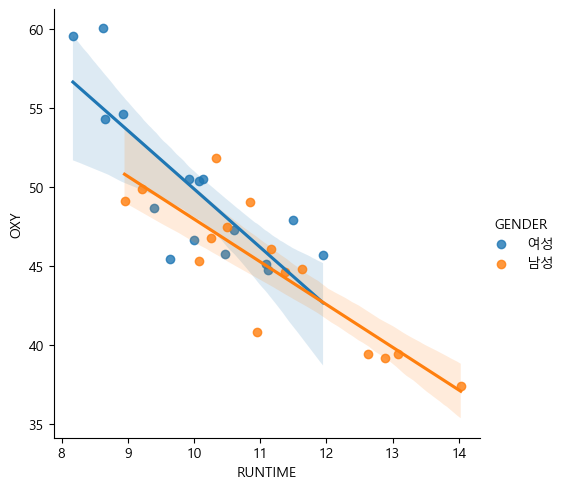

In [43]:
# 회귀선 포함하여 그리기
sns.lmplot(x='RUNTIME',y='OXY',hue='GENDER',data=df_fitness,height=5)

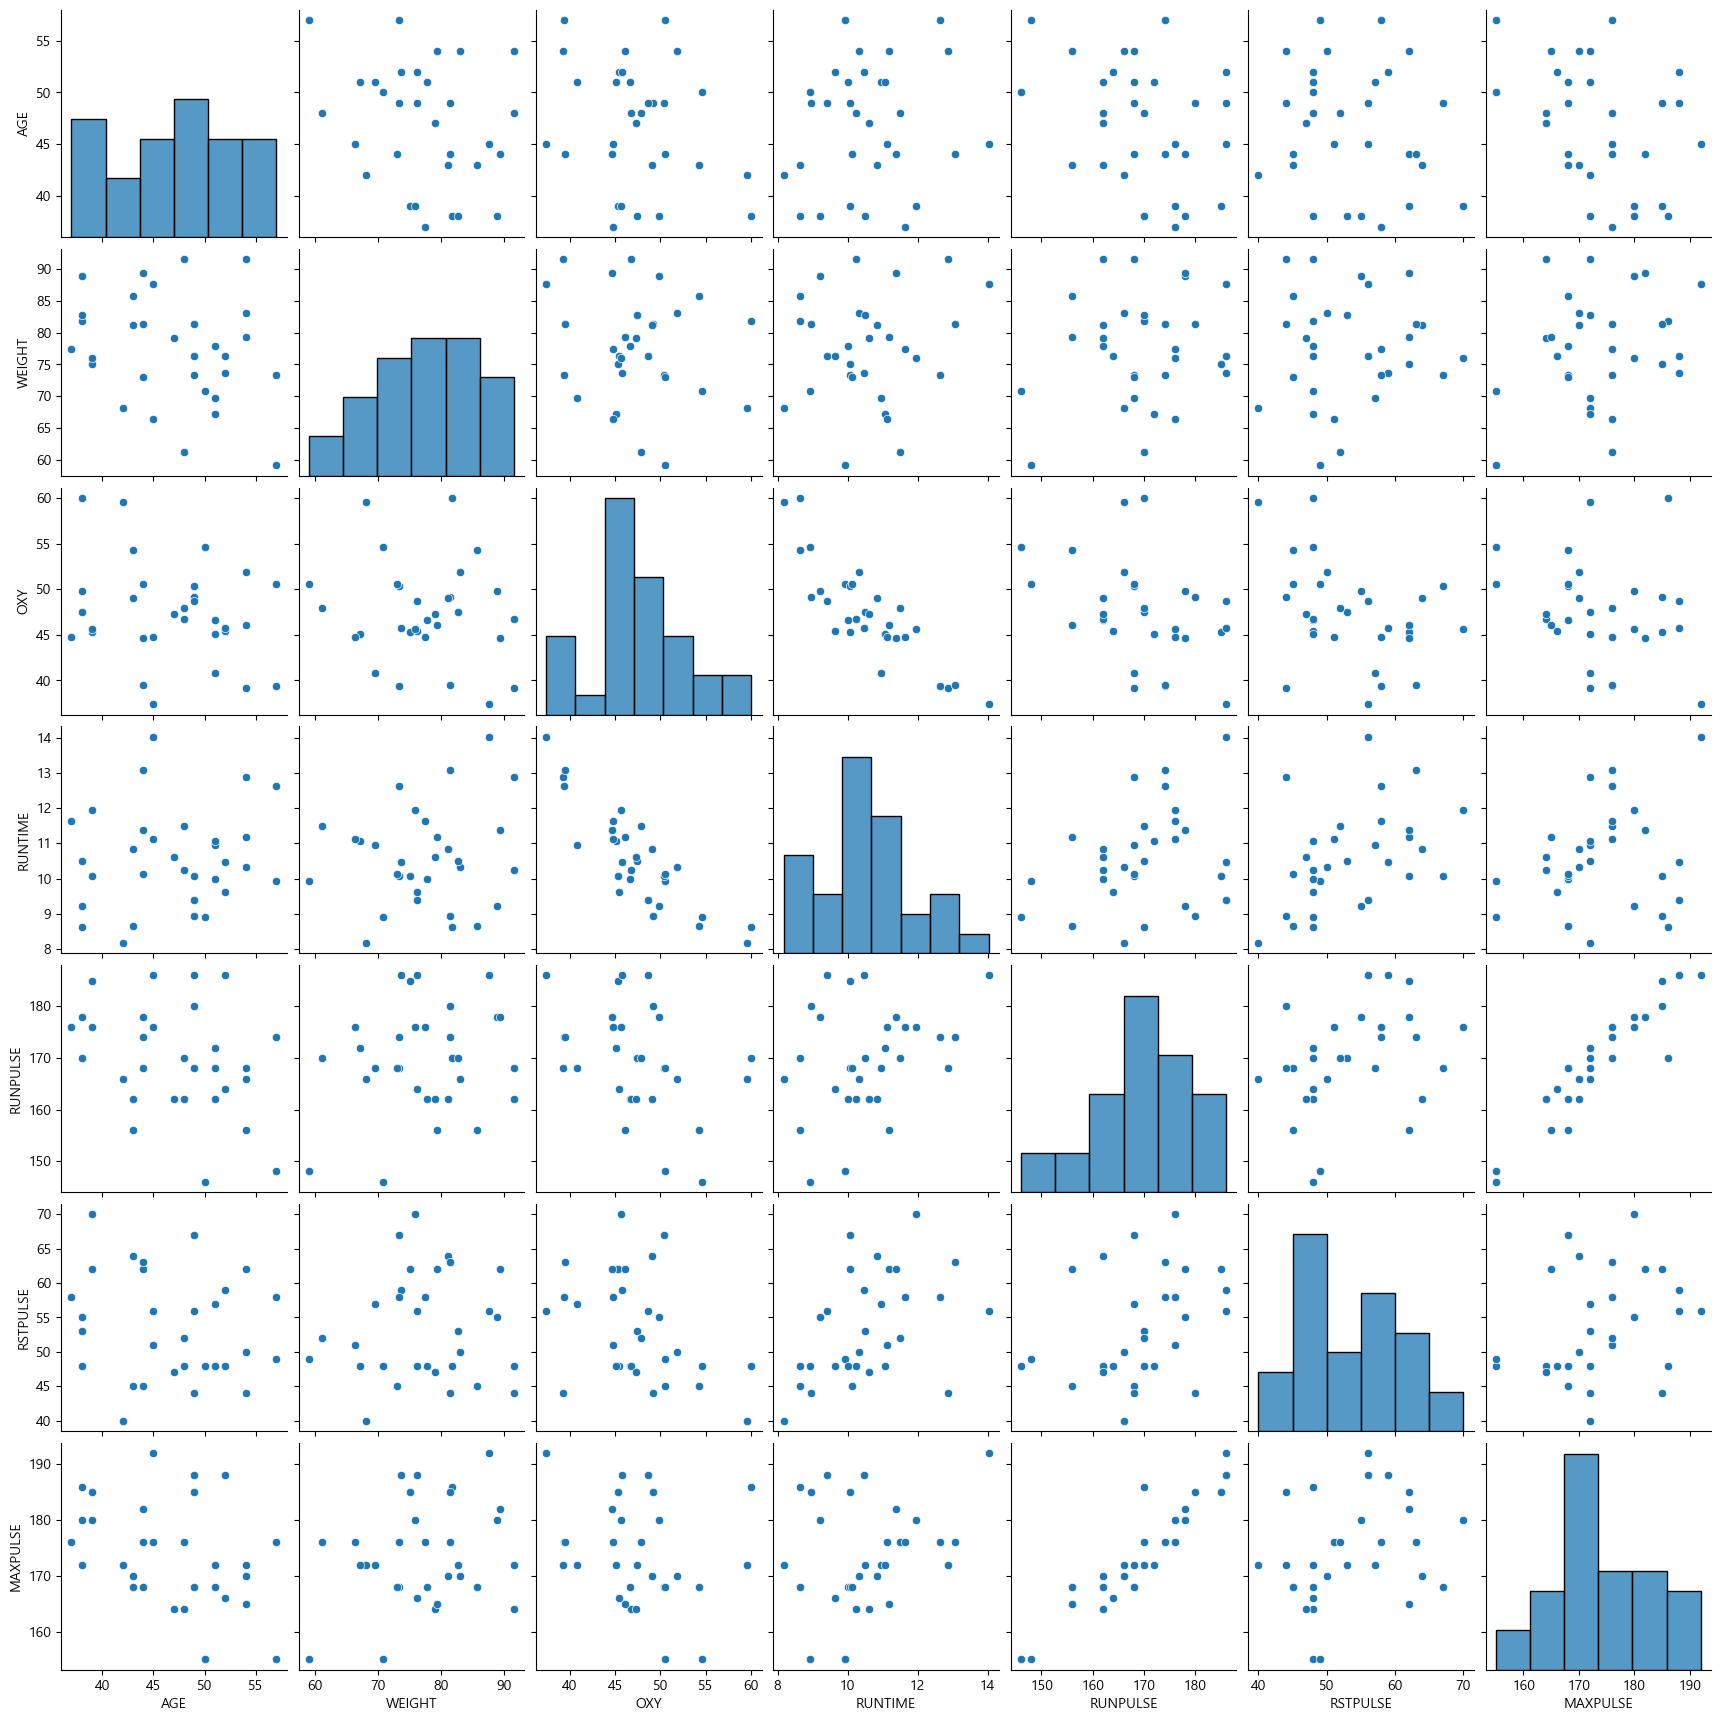

In [44]:
# 수치형 전체변수에 대한 Scatter Matrix 그리기
# pairplot(데이터) : Scatter Plot 그래프 생성
sns.pairplot(df_fitness)

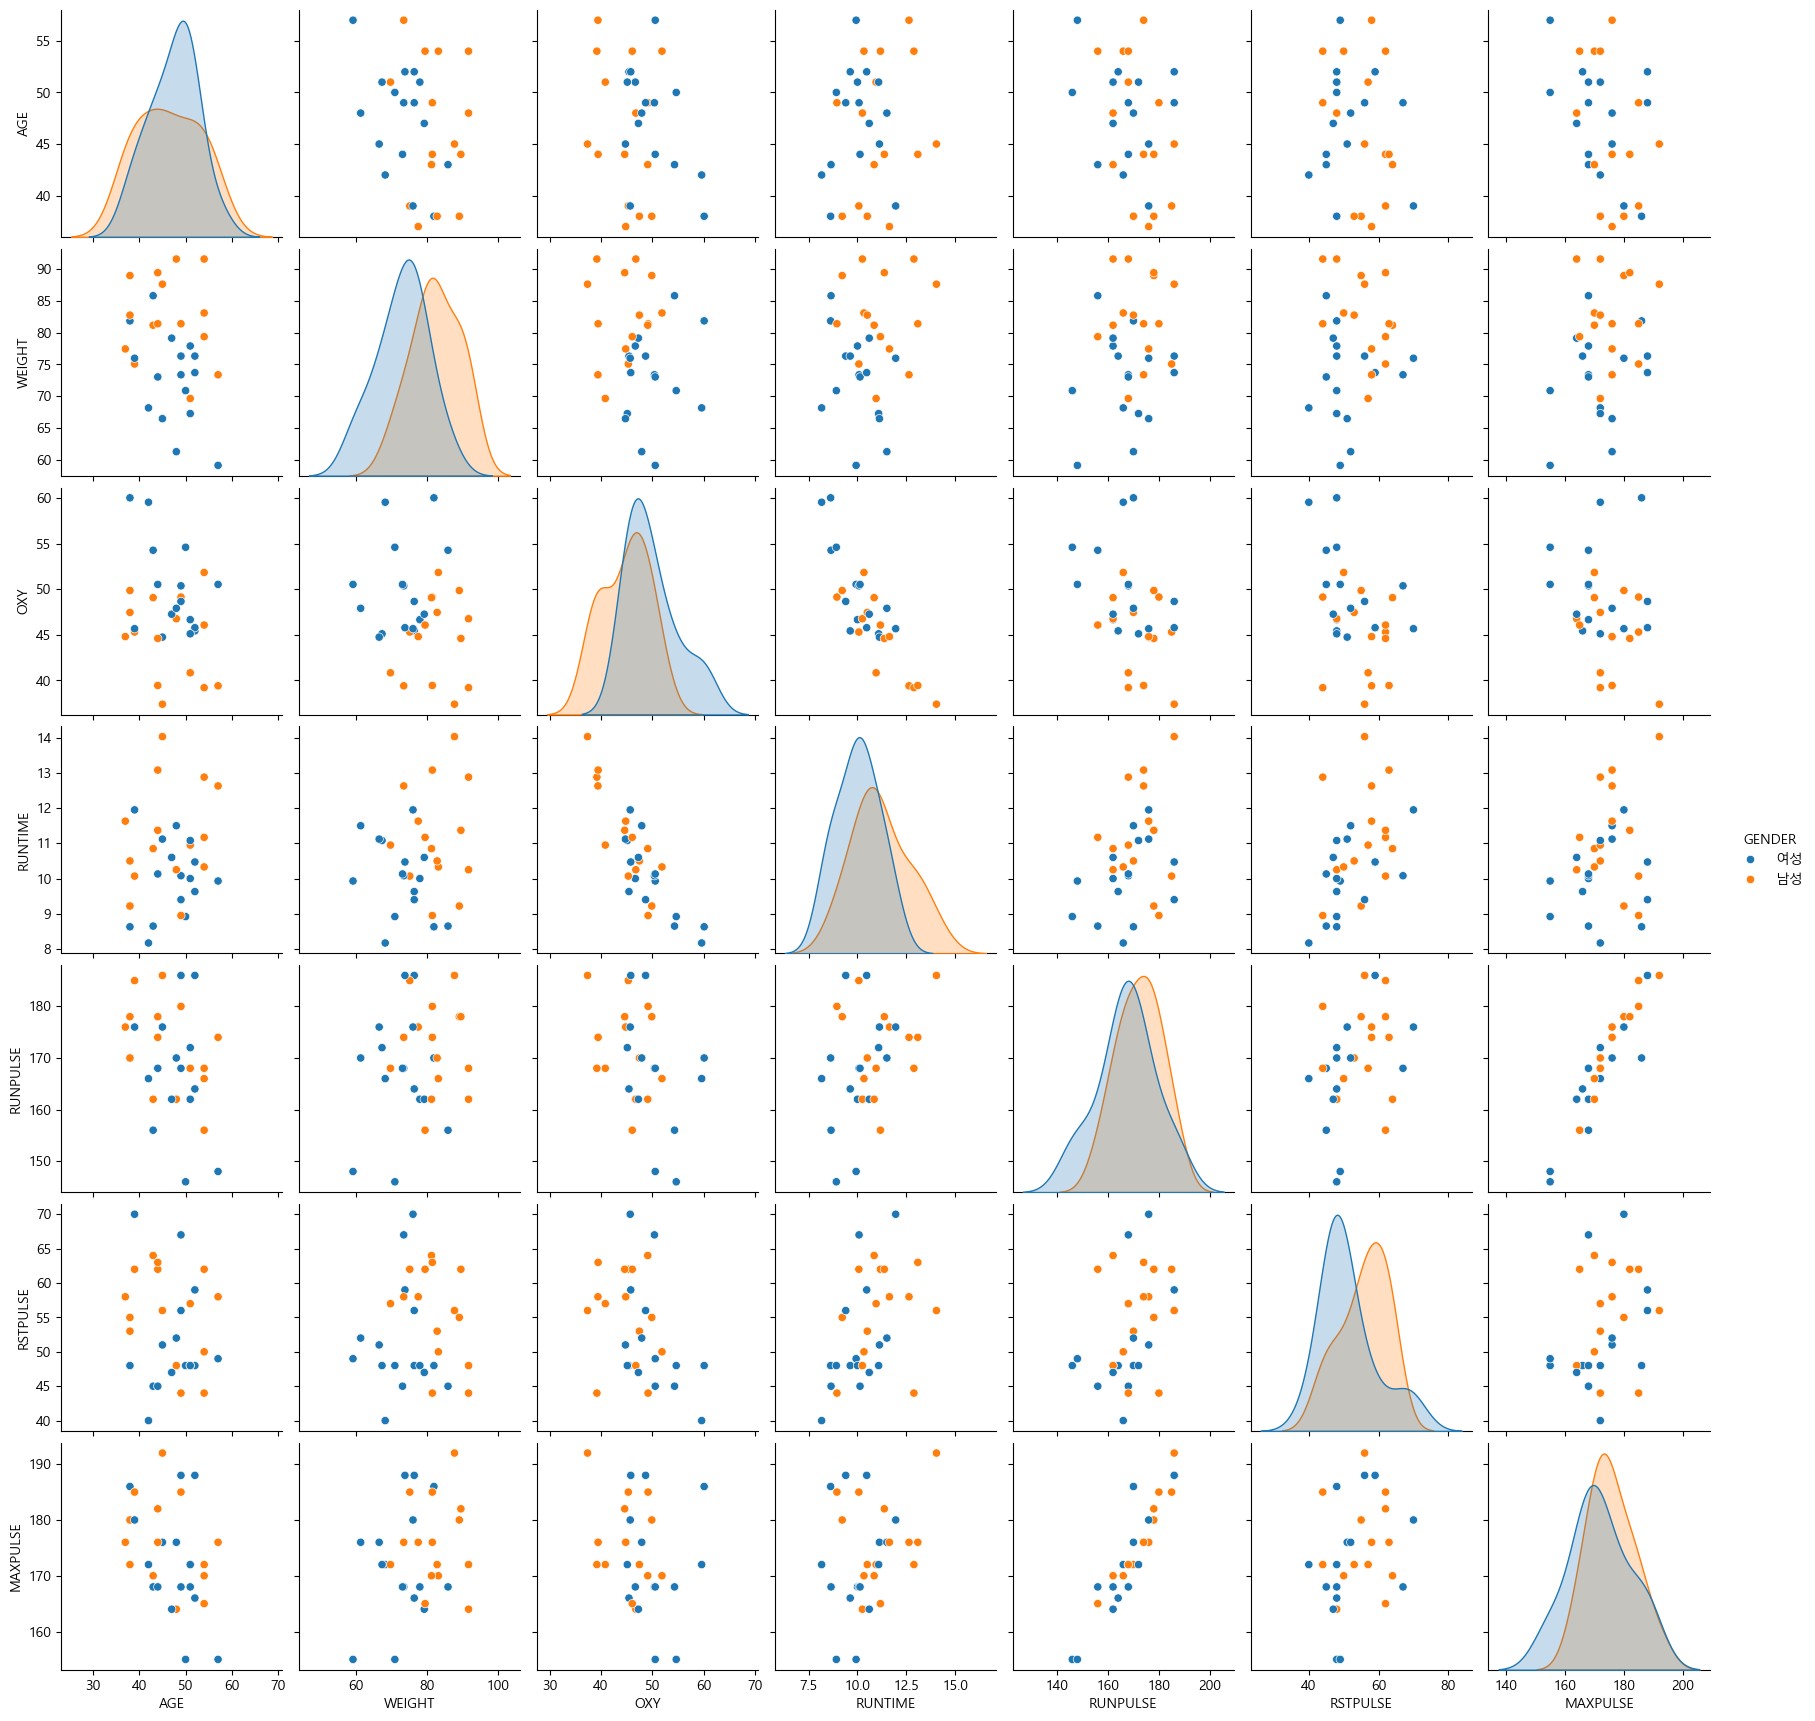

In [46]:
# 성별로 그리기
sns.pairplot(df_fitness,hue='GENDER')

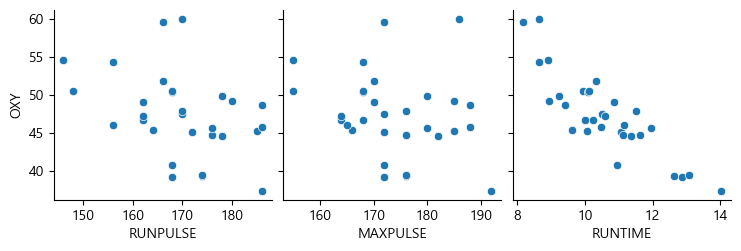

In [47]:
# 운동시 맥박수,최대 맥박수, 운동시간과 혈당 산소 유구량에 대한 Scatter Matrix 그리기

# y변수 : 혈당산소 요구량,X변수:맥박(운동),맥박(최대),운동시간 Scatter Matrix 생성
sns.pairplot(df_fitness,y_vars=['OXY'], x_vars=['RUNPULSE','MAXPULSE','RUNTIME'])

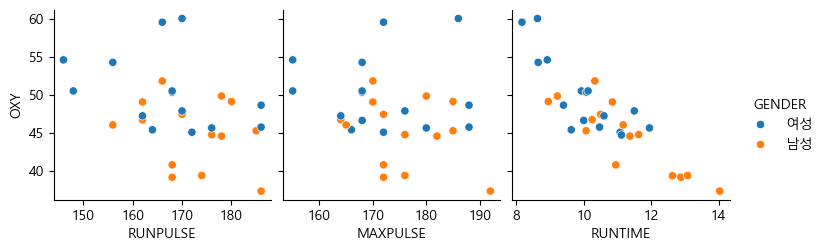

In [48]:
sns.pairplot(df_fitness,y_vars=['OXY'], x_vars=['RUNPULSE','MAXPULSE','RUNTIME'],hue='GENDER')

In [49]:
# 성별, 연령대별 혈당 산소 요구량에 대한 Heatmap 생성

# 성별과 연령대별 혈당 산소 요구량 평균 계산,group:(성별,연령), age('mean')
df_agg = df_fitness.groupby(['GENDER','AGEGROUP'],as_index=False)['OXY'].agg('mean')

# pivot(성별,연령대,혈당 산소 요구량, x축 (연령대),y축(성별),값(혈당산소 요구량의 평균)으로 pivot)
df_pivot = df_agg.pivot(index='GENDER',columns='AGEGROUP',values='OXY')
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


<Axes: xlabel='AGEGROUP', ylabel='GENDER'>

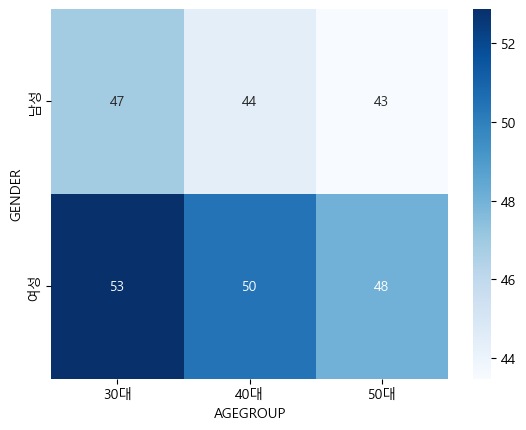

In [50]:
# seborn 활용 : heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot,annot=True,cmap='Blues')

<Axes: >

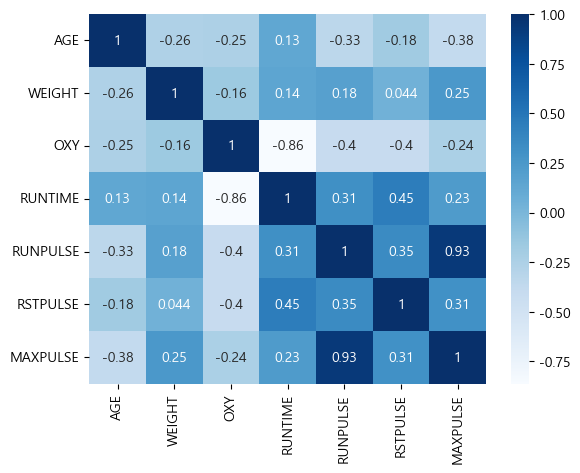

In [57]:
# 상관계수 heatmap 그리기
# seaborn 활용
df_num = df_fitness.select_dtypes(exclude='object')
df_cor = df_num.corr(method ='pearson')
sns.heatmap(df_cor,annot=True,cmap='Blues')

# pip install --upgrade seaborn 상관계수 안나오면 
# seaborn 0.13.2 버전으로 업데이트

<Axes: xlabel='RUNTIME', ylabel='OXY'>

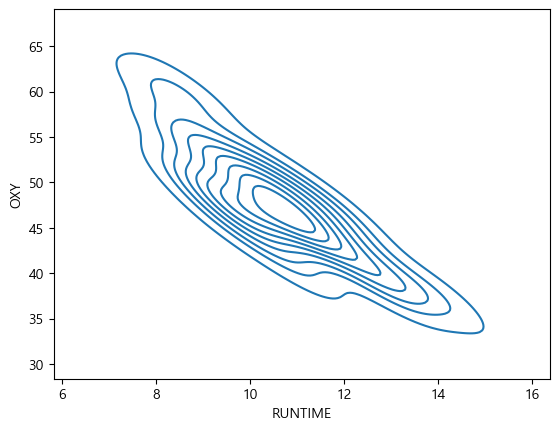

In [341]:
# 운동시간과 혈당 산소 요구량에 대한 Contour Plot 생성

# seaborn 활용 : kdeplot(x축,y축, shade:음영 선택 여부)
sns.kdeplot(x=df_fitness['RUNTIME'], y=df_fitness['OXY'], shade=False)

<Axes: xlabel='RUNTIME', ylabel='OXY'>

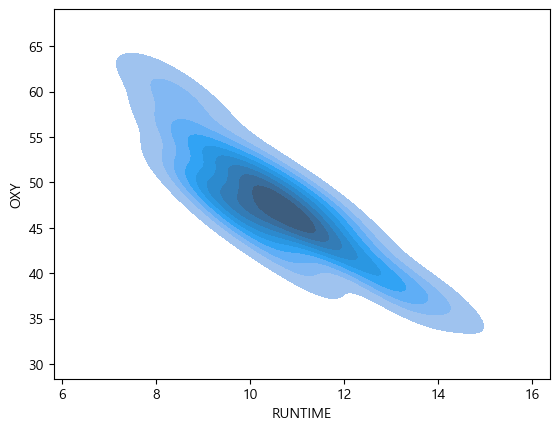

In [343]:
sns.kdeplot(x=df_fitness['RUNTIME'], y=df_fitness['OXY'], shade=True)

<Axes: >

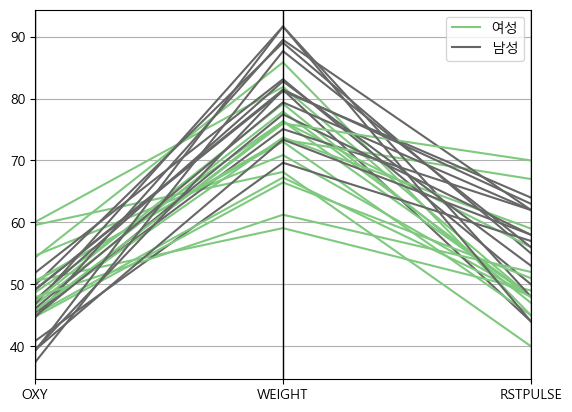

In [345]:
# 성별에 따른 혈당 산소 요구량,몸무게 , 휴식 시 맥박수에 대한 Parallel Plot 그리기

# parallel_coordinates(데이터,그룹 변수, cols=변수, colormap=다양한 colormap 지정)
pd.plotting.parallel_coordinates(df_fitness,'GENDER',cols=['OXY','WEIGHT','RSTPULSE'],
                                colormap='Accent')

<Axes: >

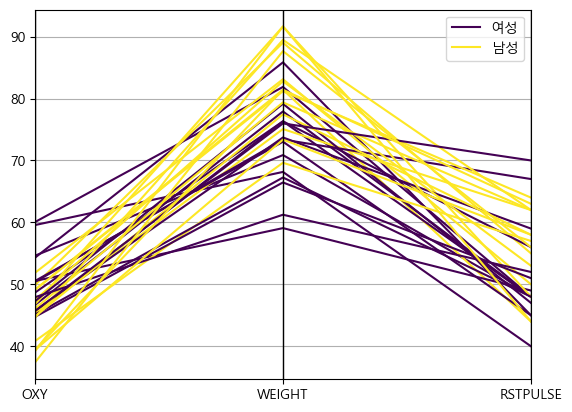

In [347]:
# 다른 색상으로 표현
pd.plotting.parallel_coordinates(df_fitness,'GENDER',cols=['OXY','WEIGHT','RSTPULSE'],
                                colormap='viridis')

In [349]:
# 통화별로 환율에 대한 Trend Chart 그리기

# pivot 활용하여 각국 통화별 데이터 생성
df_currency_pivot = df_currency.pivot(index='APPL_DATE',columns='CURRENCY',
                                     values='STD_RATE')

df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


<Axes: xlabel='APPL_DATE'>

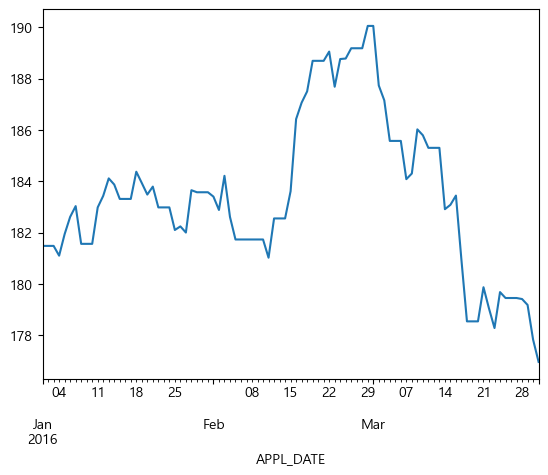

In [351]:
# 중국 위안화 그래프 그리기
df_currency_pivot['CNY'].plot()

<Axes: xlabel='APPL_DATE'>

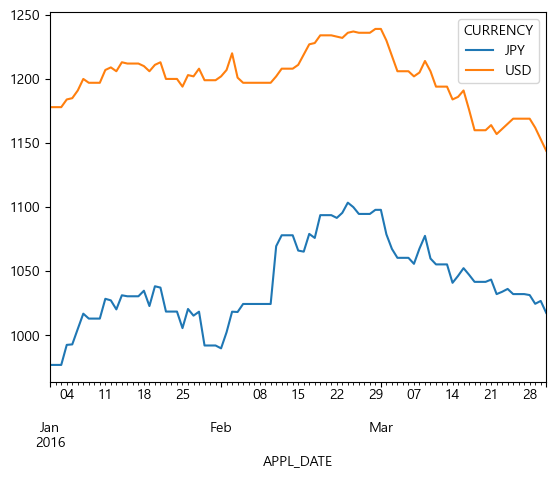

In [353]:
# 일본 엔화,미국 달러 그래프 그리기
df_currency_pivot[['JPY','USD']].plot()

In [355]:
pip install --upgrade seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------------------------- ---------- 215.0/294.9 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [357]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\campus4D046\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno
